# Getting started

Once you've chosen your scenario, download the data from [the Iowa website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy) in csv format. Start by loading the data with pandas. You may need to parse the date columns appropriately.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

In [5]:
# Named csv 'Iowa"
Iowa = pd.read_csv('/Users/macbook/GA-DSI/projects/projects-weekly/project-03/Iowa_Liquor_sales_sample_10pct.csv')

In [18]:
# Observe Data 
Iowa.head()


,date,store_number,city,zip_code,county_number,county,category,category_name,vendor_number,item_number,item_description,bottle_volume,state_bottle_cost,state_bottle_retail,bottles_sold,sales,volume_sold,volume_sold_gallons
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34
3,2016-02-03,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,10.5,2.77
4,2015-08-18,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.0,5.55


In [15]:
# Remove all NaN values

Iowa = Iowa.dropna()

In [21]:
# Checking types
Iowa.dtypes

date                   datetime64[ns]
store_number                    int64
city                           object
zip_code                        int64
county_number                   int64
county                         object
category                      float64
category_name                  object
vendor_number                   int64
item_number                     int64
item_description               object
bottle_volume                   int64
state_bottle_cost              object
state_bottle_retail            object
bottles_sold                    int64
sales                          object
volume_sold                   float64
volume_sold_gallons           float64
dtype: object

In [11]:
# Clean up column names 1: remove units of measurement
Iowa.rename(columns = {'Bottle Volume (ml)': 'Bottle Volume', 'Sale (Dollars)': 'Sales', \
                      'Volume Sold (Liters)': 'Volume Sold', \
                       'Volume Sold (Gallons)': 'Volume Sold Gallons'}, inplace=True)

# Clean up column names 2: convert all to lowercase letters
import string 
lower = string.ascii_lowercase
Iowa.rename(columns = lambda x: x.lower(), inplace=True)

# Clean up column names 3: replace '', '(' and ')'
Iowa.rename(columns = lambda x: x.replace(' ', '_'), inplace=True)
Iowa.rename(columns = lambda x: x.replace('(', ''), inplace=True)
Iowa.rename(columns = lambda x: x.replace(')', ''), inplace=True)

In [13]:
#Change Date to datetime
Iowa['date'] = pd.to_datetime(Iowa['date'])

In [16]:
# Force zip codes to floats, change to ints
Iowa['zip_code'] = pd.to_numeric(Iowa['zip_code'], errors = 'coerce')
Iowa['zip_code'] = Iowa.loc[:, ['zip_code']].astype(int)

In [19]:
# Change County Number to int
Iowa['county_number'] = Iowa.loc[:, ['county_number']].astype(int)

In [20]:
Iowa.head()

,date,store_number,city,zip_code,county_number,county,category,category_name,vendor_number,item_number,item_description,bottle_volume,state_bottle_cost,state_bottle_retail,bottles_sold,sales,volume_sold,volume_sold_gallons
0,2015-11-04,3717,SUMNER,50674,9,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,2016-03-02,2614,DAVENPORT,52807,82,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,2016-02-11,2106,CEDAR FALLS,50613,7,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34
3,2016-02-03,2501,AMES,50010,85,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,10.5,2.77
4,2015-08-18,3654,BELMOND,50421,99,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.0,5.55


In [22]:
# Checking for NaNs
Iowa.isnull().sum()

date                   0
store_number           0
city                   0
zip_code               0
county_number          0
county                 0
category               0
category_name          0
vendor_number          0
item_number            0
item_description       0
bottle_volume          0
state_bottle_cost      0
state_bottle_retail    0
bottles_sold           0
sales                  0
volume_sold            0
volume_sold_gallons    0
dtype: int64

In [23]:
# Changing types of all dollar columns

Iowa['state_bottle_retail'] = Iowa['state_bottle_retail'].str.replace('$', '')
Iowa['state_bottle_cost'] = Iowa['state_bottle_cost'].str.replace('$', '')
Iowa['sales'] = Iowa['sales'].str.replace('$', '')

Iowa['state_bottle_retail'] = Iowa.loc[:, ['state_bottle_retail']].astype(float)
Iowa['state_bottle_cost'] = Iowa.loc[:, ['state_bottle_cost']].astype(float)
Iowa['sales'] = Iowa.loc[:, ['sales']].astype(float)

In [25]:
# Create category table to observe
category_df = Iowa.groupby('category')[['category', 'category_name']]
desc_df = Iowa.groupby('item_number')[['item_number', 'item_description']]
county_df = Iowa.groupby('county_number')[['county_number', 'county']]

In [27]:
category_df.head()

,category,category_name
0,1051100.0,APRICOT BRANDIES
1,1011100.0,BLENDED WHISKIES
2,1011200.0,STRAIGHT BOURBON WHISKIES
3,1071100.0,AMERICAN COCKTAILS
4,1031080.0,VODKA 80 PROOF
5,1041100.0,AMERICAN DRY GINS
6,1051010.0,AMERICAN GRAPE BRANDIES
7,1012100.0,CANADIAN WHISKIES
8,1032080.0,IMPORTED VODKA
9,1081315.0,CINNAMON SCHNAPPS


In [ ]:
# Generalize categories

#vodka
#schnapps
#whiskey
#rum
#scotch
#gin
#liqueurs
#brandies
#tequila
#beer
#other

In [28]:
# Create a Year column.

Iowa['year'] = Iowa['date'].map(lambda x: x.year)

In [29]:
#Create profit per bottle and total profit per category
Iowa["profit_per_bottle"] = (Iowa["state_bottle_retail"] - Iowa["state_bottle_cost"]) * Iowa["bottles_sold"]
Iowa['total_profit'] = (Iowa['profit_per_bottle']  * Iowa['bottles_sold'])
Iowa.head()

,date,store_number,city,zip_code,county_number,county,category,category_name,vendor_number,item_number,...,bottle_volume,state_bottle_cost,state_bottle_retail,bottles_sold,sales,volume_sold,volume_sold_gallons,year,profit_per_bottle,total_profit
0,2015-11-04,3717,SUMNER,50674,9,Bremer,1051100.0,APRICOT BRANDIES,55,54436,...,750,4.50,6.75,12,81.00,9.0,2.38,2015,27.00,324.00
1,2016-03-02,2614,DAVENPORT,52807,82,Scott,1011100.0,BLENDED WHISKIES,395,27605,...,750,13.75,20.63,2,41.26,1.5,0.40,2016,13.76,27.52
2,2016-02-11,2106,CEDAR FALLS,50613,7,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,...,1000,12.59,18.89,24,453.36,24.0,6.34,2016,151.20,3628.80
3,2016-02-03,2501,AMES,50010,85,Story,1071100.0,AMERICAN COCKTAILS,395,59154,...,1750,9.50,14.25,6,85.50,10.5,2.77,2016,28.50,171.00
4,2015-08-18,3654,BELMOND,50421,99,Wright,1031080.0,VODKA 80 PROOF,297,35918,...,1750,7.20,10.80,12,129.60,21.0,5.55,2015,43.20,518.40


In [30]:
profit_store_per_type = Iowa.groupby('store_number')[('store_number', 'city', 'total_profit', 'year')]
profit_store_per_type.sort(['city', 'store_number', 'total_profit', 'year'], axis=1, 'True')


SyntaxError: non-keyword arg after keyword arg (<ipython-input-30-a3bdb008c7f7>, line 2)

In [ ]:
store_profit = pd.pivot_table(Iowa, values=['city'], index=['store_number', 'total_profit', 'year'], aggfunc=np.sum)
store_profit.reset_index(inplace=True)
store_profit.drop('city', axis=1, inplace=True)
store_profit.head()

# Explore the data

Perform some exploratory statistical analysis and make some plots, such as histograms of transaction totals, bottles sold, etc.

In [55]:

store_sales_2015 = store_sales[store_sales['year'] == 2015]

In [62]:
store_sales_2015_sort = store_sales_2015.sort([('total_profit', 'volume_sold')], ascending = False)

plt.figure(figsize=(12,8))
sns.barplot(store_sales_2015_sort['store_number'], store_sales_2015_sort['total_profit']['sum'])

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


KeyError: ('total_profit', 'volume_sold')

In [ ]:
plt.figure(figsize=(15,15)) # Set large figure size

plt.scatter(x_test, y_test,  color='black') # Plot Data Points 
plt.plot(x_test.reshape(x_test.shape[0],1), 
         regr.predict(x_test.reshape(x_test.shape[0],1)), 
         color='blue',
         linewidth=3)

plt.xticks()
plt.yticks()

plt.xlabel("Weeks")
plt.ylabel("Projected Profit ($)")
plt.title("2015 Sales in Top 10 Iowa Counties")

plt.xlim(1,53)
plt.ylim(0,5000000)

plt.show()

In [61]:
ax = sns.lmplot(x='City',
                y='total_profit',
                hue='store_number', data=sales,
               size=12)

ax.set(xlabel="Week of 2015",
      ylabel="Total Profit Margin ($)",
      title="Cumulative Profits By Week")
plt.xlim(0,53)
plt.ylim(0,5000000)
plt.show()

NameError: name 'sales' is not defined

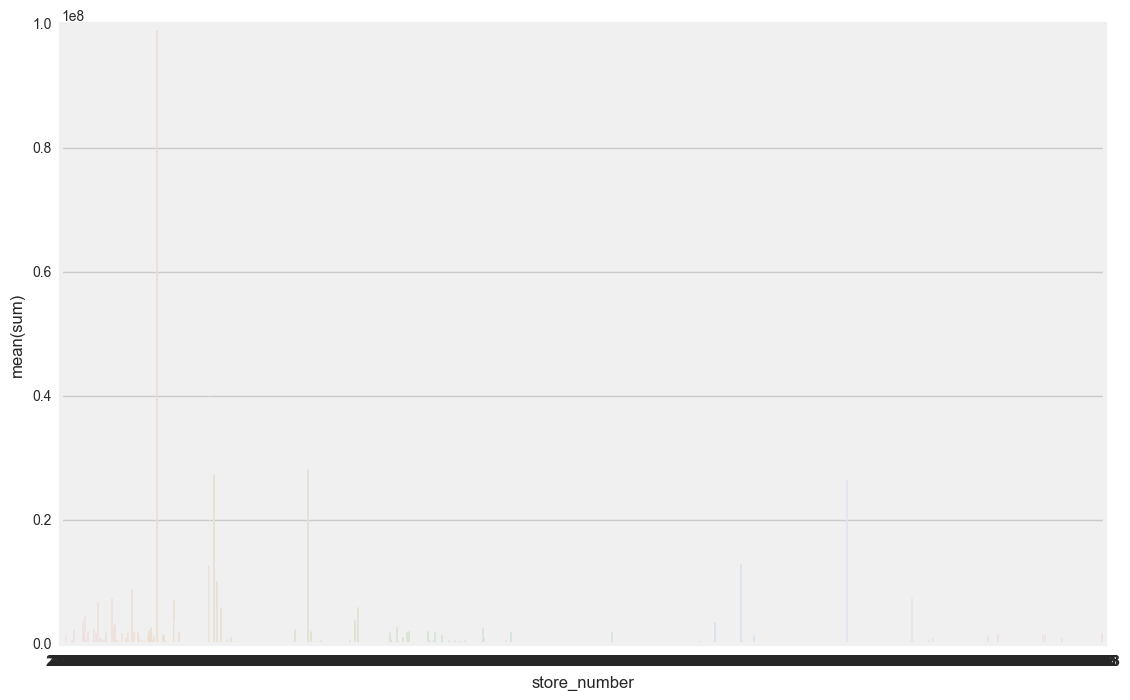

In [60]:
plt.figure(figsize=(12,8))
sns.barplot(store_sales_2015['store_number'], store_sales_2015['total_profit']['sum'])

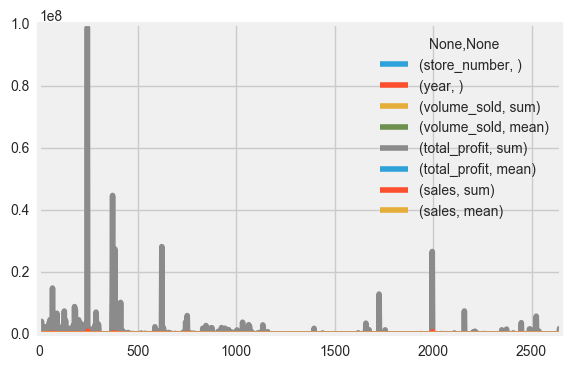

In [59]:
store_sales_2015.plot(type=bar)

In [56]:
store_sales_2015


store_number             city  year volume_sold             total_profit  \
                                                 sum        mean          sum   
0            2106      CEDAR FALLS  2015     9719.85   18.478802   1983800.16   
2            2113           GOWRIE  2015      659.85    4.488776     25470.08   
4            2130         WATERLOO  2015     6879.37   17.594297   2088815.94   
6            2152         ROCKWELL  2015      633.37    4.491986     23742.33   
8            2178           WAUKON  2015     1917.12    8.089114    109671.60   
10           2190       DES MOINES  2015     6322.17    4.807734   1422342.89   
12           2191           KEOKUK  2015     8053.32   13.512282   4174883.41   
14           2200         SAC CITY  2015     1817.24    4.509280     71886.41   
16           2205         CLARINDA  2015     1555.41    5.419547     90963.93   
17           2228        WINTERSET  2015     1367.65    5.698542     75629.76   
19           2233      SPIRIT LAKE  2015     2480.69   10.293320    157669.12   
21           2238          ALTOONA  2015      705.75   11.569672     98666.23   
23           2248       DES MOINES  2015     2815.35    6.120326    239994.83   
25           2285        IOWA CITY  2015     3860.35   12.615523    730597.83   
27           2290       STORM LAKE  2015     3620.45    4.635659    310957.08   
29           2327          CORNING  2015      822.28    4.350688     31982.87   
31           2353           CRESCO  2015     4486.65   12.394061   2406392.67   
33           2367       SHENANDOAH  2015      346.75    7.705556     18890.93   
34           2413          DUBUQUE  2015     6261.29   13.017235    613160.22   
36           2445          OAKLAND  2015      571.79    3.343801     12883.93   
38           2448        INDIANOLA  2015     1245.53    3.030487     42754.23   
40           2459   GUTHRIE CENTER  2015      607.24    5.622593     23308.66   
42           2460          HAMPTON  2015     2782.46    8.355736    311744.84   
43           2465          DUBUQUE  2015     1713.20    4.381586     76104.62   
45           2475        WEST BEND  2015     1044.94   14.120811    209310.60   
47           2478          ALTOONA  2015     1038.00   12.069767    114413.06   
49           2487          ANAMOSA  2015     2547.85    6.229462    177187.27   
50           2498        ARLINGTON  2015      230.12    3.967586      4372.08   
52           2500             AMES  2015    10039.15    8.514970   3856901.18   
54           2501             AMES  2015     9959.40    7.774707   1499315.99   
...           ...              ...   ...         ...         ...          ...   
2591         5180          OELWEIN  2015      175.25    4.868056     10893.72   
2593         5181           DENVER  2015       65.30    5.936364      3679.21   
2595         5182   COUNCIL BLUFFS  2015      164.70    9.150000     16310.88   
2597         5183          CASCADE  2015       61.80   10.300000      5172.48   
2599         5185       CORALVILLE  2015       73.00    5.615385      3377.85   
2601         5186       WEST UNION  2015       16.49    2.355714       536.40   
2603         5187             AMES  2015      218.31    2.630241     17468.73   
2605         5188       SIOUX CITY  2015       96.40    5.670588      6228.00   
2607         5189  WEST DES MOINES  2015       39.00    9.750000      2017.80   
2609         5190          WALFORD  2015       69.75    4.650000      2802.06   
2611         5191   GUTHRIE CENTER  2015       19.50    4.875000       608.04   
2613         5192           ROBINS  2015        4.50    4.500000       180.00   
2615         5193        LOHRVILLE  2015        9.00    3.000000       213.93   
2617         5196       CORALVILLE  2015       37.97    2.373125      1157.74   
2619         5198        DAVENPORT  2015      200.43    3.131719     13235.21   
2621         5199          OELWEIN  2015      148.80    9.300000     48620.02   
2623         5201          DUBUQUE  

In [48]:
Iowa_cities = pd.pivot_table(Iowa, index=['city', 'year', 'store_number'], values=['total_profit'])


In [49]:
Iowa_cities

total_profit
city            year store_number              
ACKLEY          2015 3591            169.039706
                     4415            322.919756
                2016 4415             92.243125
ADAIR           2015 4417            678.951667
                     4753            589.264615
                2016 4417            811.584000
                     4753            324.000000
ADEL            2015 4384            295.821200
                     4678           5118.927770
                     4929            894.960000
                2016 4384            233.394348
                     4678           3207.058500
                     4929           1050.600000
AFTON           2015 4531           2513.952000
                2016 4531           1830.240000
AKRON           2015 4525            303.628214
                2016 4525            308.873077
ALBIA           2015 2559            288.245704
                     4011            494.057105
                2016 2559            233.205200
                     4011            239.527586
ALDEN           2015 4172            266.655275
                     4497           1379.040000
                2016 4172            154.760400
ALGONA          2015 2585           3189.586730
                     3987           1174.614972
                     4268           4723.461630
                2016 2585           1115.244397
                     3987            292.086897
                     4268            264.642500
...                                         ...
WINDSOR HEIGHTS 2015 3645            609.988125
                     3762            386.691009
                     4461            285.074595
                     5107            191.061228
                2016 2620            221.490049
                     3420          26889.730787
                     3645            537.200816
                     3762            338.455435
                     4461            174.905882
                     5107             70.321034
WINTERSET       2015 2228            315.124000
                     2672            805.707884
                     4253          25779.096000
                     4786           1258.052174
                     4848            194.548472
                2016 2228            125.640606
                     2672           2014.194474
                     4253           2412.037895
                     4786            281.173333
                     4848             82.988333
WINTHROP        2015 4090            536.893462
                     4498            178.284375
                2016 4090            471.035000
                     4498            125.388000
WOODBINE        2015 4000            135.174309
                2016 4000            140.705000
WOODWARD        2015 4577            299.134286
                2016 4577            320.194286
ZWINGLE         2015 4885            559.856250
                2016 4885            435.200833

[2652 rows x 1 columns]

In [50]:
# Compute sales per county. Because I got confused.
county_year = Iowa.groupby(by=['county', 'year'], as_index=False)
# Compute sums, means
county_sales = county_year.agg({'sales': [np.sum, np.mean],                           
                           'volume_sold': [np.sum, np.mean],
                           'total_profit': [np.sum, np.mean]})      
                           

In [54]:
#Compute sales per store sum and mean
city_sales = Iowa.groupby(by=['store_number', 'city', 'year'], as_index=False)

store_sales = city_sales.agg({'sales':[np.sum, np.mean],
                             'volume_sold': [np.sum, np.mean],
                             'total_profit': [np.sum, np.mean]})
store_sales.head(3)

store_number         city  year volume_sold            total_profit  \
                                          sum       mean          sum   
0         2106  CEDAR FALLS  2015     9719.85  18.478802   1983800.16   
1         2106  CEDAR FALLS  2016     2116.25  16.795635    405854.42   
2         2113       GOWRIE  2015      659.85   4.488776     25470.08   

                    sales              
          mean        sum        mean  
0  3771.483194  146038.70  277.640114  
1  3221.066825   30478.75  241.894841  
2   173.265850    9310.22   63.334830

In [ ]:

sns.pairplot(store_sales, kind="reg");

In [ ]:
col_list = store_sales.columns

In [ ]:
store_sales.loc[:, col_list].corr()

In [ ]:
store_sales.columns


## Record your findings

Be sure to write out anything observations from your exploratory analysis.

# Mine the data
Now you are ready to compute the variables you will use for your regression from the data. For example, you may want to
compute total sales per store from Jan to March of 2015, mean price per bottle, etc. Refer to the readme for more ideas appropriate to your scenario.

Pandas is your friend for this task. Take a look at the operations [here](http://pandas.pydata.org/pandas-docs/stable/groupby.html) for ideas on how to make the best use of pandas and feel free to search for blog and Stack Overflow posts to help you group data by certain variables and compute sums, means, etc. You may find it useful to create a new data frame to house this summary data.

# Refine the data
Look for any statistical relationships, correlations, or other relevant properties of the dataset.

# Build your models

Using scikit-learn or statsmodels, build the necessary models for your scenario. Evaluate model fit.

In [ ]:
from sklearn import linear_model


## Plot your results

Again make sure that you record any valuable information. For example, in the tax scenario, did you find the sales from the first three months of the year to be a good predictor of the total sales for the year? Plot the predictions versus the true values and discuss the successes and limitations of your models

# Present the Results

Present your conclusions and results. If you have more than one interesting model feel free to include more than one along with a discussion. Use your work in this notebook to prepare your write-up.